<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/5%20-%20Reti%20Neurali/neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reti Neurali - il Multilayer Perceptron

### Importiamo i moduli

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
!wget https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/script/viz.py

--2023-07-20 12:58:59--  https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/script/viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1088 (1.1K) [text/plain]
Saving to: ‘viz.py’

viz.py              100%[===================>]   1.06K  --.-KB/s    in 0s      

2023-07-20 12:58:59 (62.1 MB/s) - ‘viz.py’ saved [1088/1088]



In [3]:
from viz import plot_decision_boundary

### Definiamo le costanti

In [4]:
RANDOM_SEED = 0

### Generiamo i dati

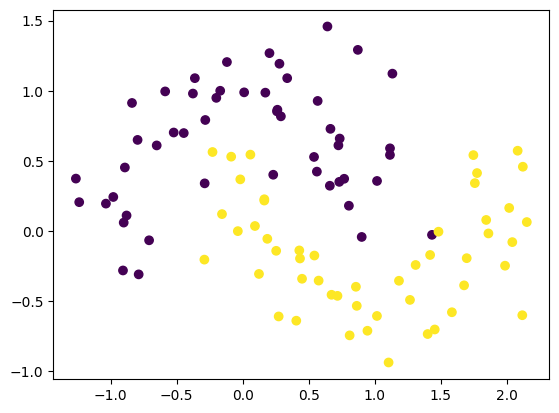

In [5]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.25, random_state=RANDOM_SEED)
plt.scatter(X[:,0], X[:,1], c=y)

### Processiamo i dati

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [7]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### Regressione Logistica

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.85

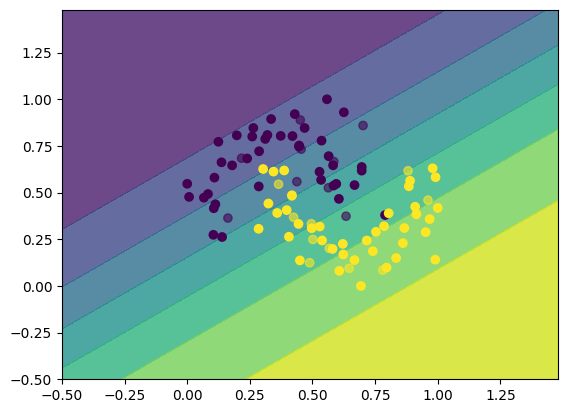

In [10]:
plot_decision_boundary(lr, (X_train, y_train), (X_test, y_test))

### Multilayer Perceptron

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,), random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9

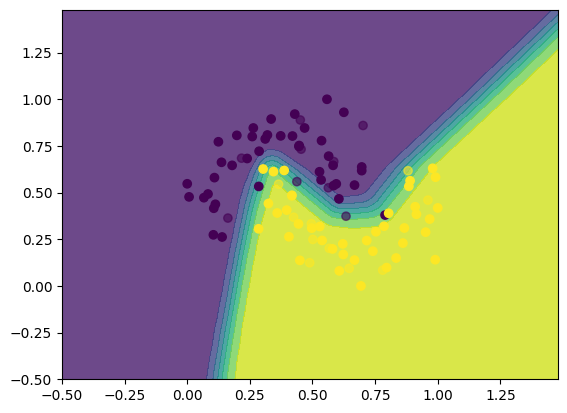

In [14]:
plot_decision_boundary(mlp, (X_train, y_train), (X_test, y_test))

In [18]:
len(mlp.coefs_)

4

In [19]:
len(mlp.intercepts_)

4

### A cosa serve la funzione di attivazione?

In [20]:
hiddel_layer_size = (100,)*10
mlp = MLPClassifier(hidden_layer_sizes=hiddel_layer_size, activation="identity", random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

MLPClassifier(activation='identity',
              hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100),
              random_state=0)

In [24]:
weights = 0

for i in range(len(mlp.coefs_)):
  coefs =  mlp.coefs_[i].size
  bias = mlp.intercepts_[i].size
  tot = coefs+bias
  print(f"\tLayer {i} => pesi={coefs} bias={bias} totale={tot}")
  weights+=tot

print(f"\nPesi totali della rete={weights}")

	Layer 0 => pesi=200 bias=100 totale=300
	Layer 1 => pesi=10000 bias=100 totale=10100
	Layer 2 => pesi=10000 bias=100 totale=10100
	Layer 3 => pesi=10000 bias=100 totale=10100
	Layer 4 => pesi=10000 bias=100 totale=10100
	Layer 5 => pesi=10000 bias=100 totale=10100
	Layer 6 => pesi=10000 bias=100 totale=10100
	Layer 7 => pesi=10000 bias=100 totale=10100
	Layer 8 => pesi=10000 bias=100 totale=10100
	Layer 9 => pesi=10000 bias=100 totale=10100
	Layer 10 => pesi=100 bias=1 totale=101

Pesi totali della rete=91301


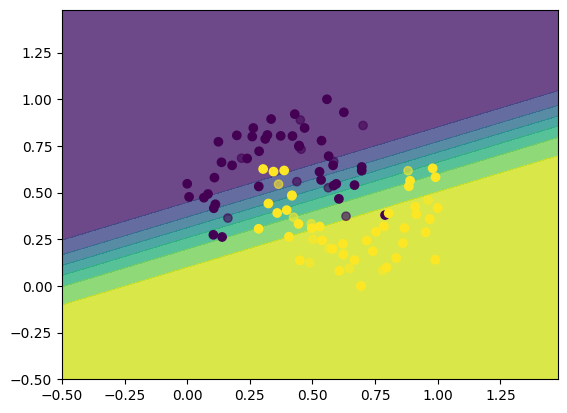

In [23]:
plot_decision_boundary(mlp, (X_train, y_train), (X_test, y_test))